In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [38]:
pd.set_option('display.max_columns', None)

##### 1. PREPARACIÓN DE DATOS (Pasos comunes a todos los modelos)
Cargar la data. Asegúrate de que el archivo 'student-por.csv' esté en la misma carpeta o proporciona la ruta correcta.
El documento original usa una ruta local, pero aquí se asume que el archivo está en el mismo directorio.

In [39]:
try:
    d = pd.read_csv('./data/student+performance/student/student-por.csv', sep=';')
except FileNotFoundError:
    print("Error: El archivo 'student-por.csv' no fue encontrado.")
    print("Por favor, descarga el archivo desde: https://archive.ics.uci.edu/ml/datasets/student+performance y colócalo en el mismo directorio que este script.")
    exit()

In [40]:
d.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [41]:
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [42]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [43]:
d.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [44]:
# Calcular si el alumno aprueba e insertar una columna con este valor (0=desaprobado, 1=aprobado)
d['pass'] = d.apply(lambda row: 1 if (row['G1'] + row['G2'] + row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)

In [45]:
# Trabajar con los datos de una sola escuela: Gabriel Pereira (GP)
d = d.loc[d['school'] == "GP"]
d.drop("school", inplace=True, axis=1)

In [46]:
# Convertir los datos cualitativos en datos numéricos (0-1)
d = pd.get_dummies(d, columns=['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])

In [47]:
d.keys()

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'pass',
       'sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3',
       'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no',
       'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes',
       'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [48]:
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,0,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,1,3,2,0,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,3,3,6,1,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,0,1,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,2,5,0,1,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False


In [49]:
d.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,pass
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,16.666667,2.725768,2.475177,1.430260,2.014184,0.172577,3.952719,3.153664,3.146572,1.470449,2.267139,3.598109,4.215130,0.602837
std,1.244895,1.077769,1.096623,0.704913,0.840214,0.551607,0.891049,0.986895,1.152899,0.899421,1.299666,1.420632,5.191915,0.489890
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,1.000000


In [50]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 0 to 422
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                423 non-null    int64
 1   Medu               423 non-null    int64
 2   Fedu               423 non-null    int64
 3   traveltime         423 non-null    int64
 4   studytime          423 non-null    int64
 5   failures           423 non-null    int64
 6   famrel             423 non-null    int64
 7   freetime           423 non-null    int64
 8   goout              423 non-null    int64
 9   Dalc               423 non-null    int64
 10  Walc               423 non-null    int64
 11  health             423 non-null    int64
 12  absences           423 non-null    int64
 13  pass               423 non-null    int64
 14  sex_F              423 non-null    bool 
 15  sex_M              423 non-null    bool 
 16  address_R          423 non-null    bool 
 17  address_U          42

ETL: Significa Extract, Transform, Load (Extraer, Transformar, Cargar)

##### ANÁLISIS EXPLORATORIO DE DATOS (EDA)
Exploratory Data Analysis (Análisis Exploratorio de Datos)

A continuación, realizaremos un análisis exploratorio detallado para comprender mejor nuestras variables y su relación con el rendimiento académico.

Cantidad de variables numéricas: 14
Variables numéricas: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'pass']


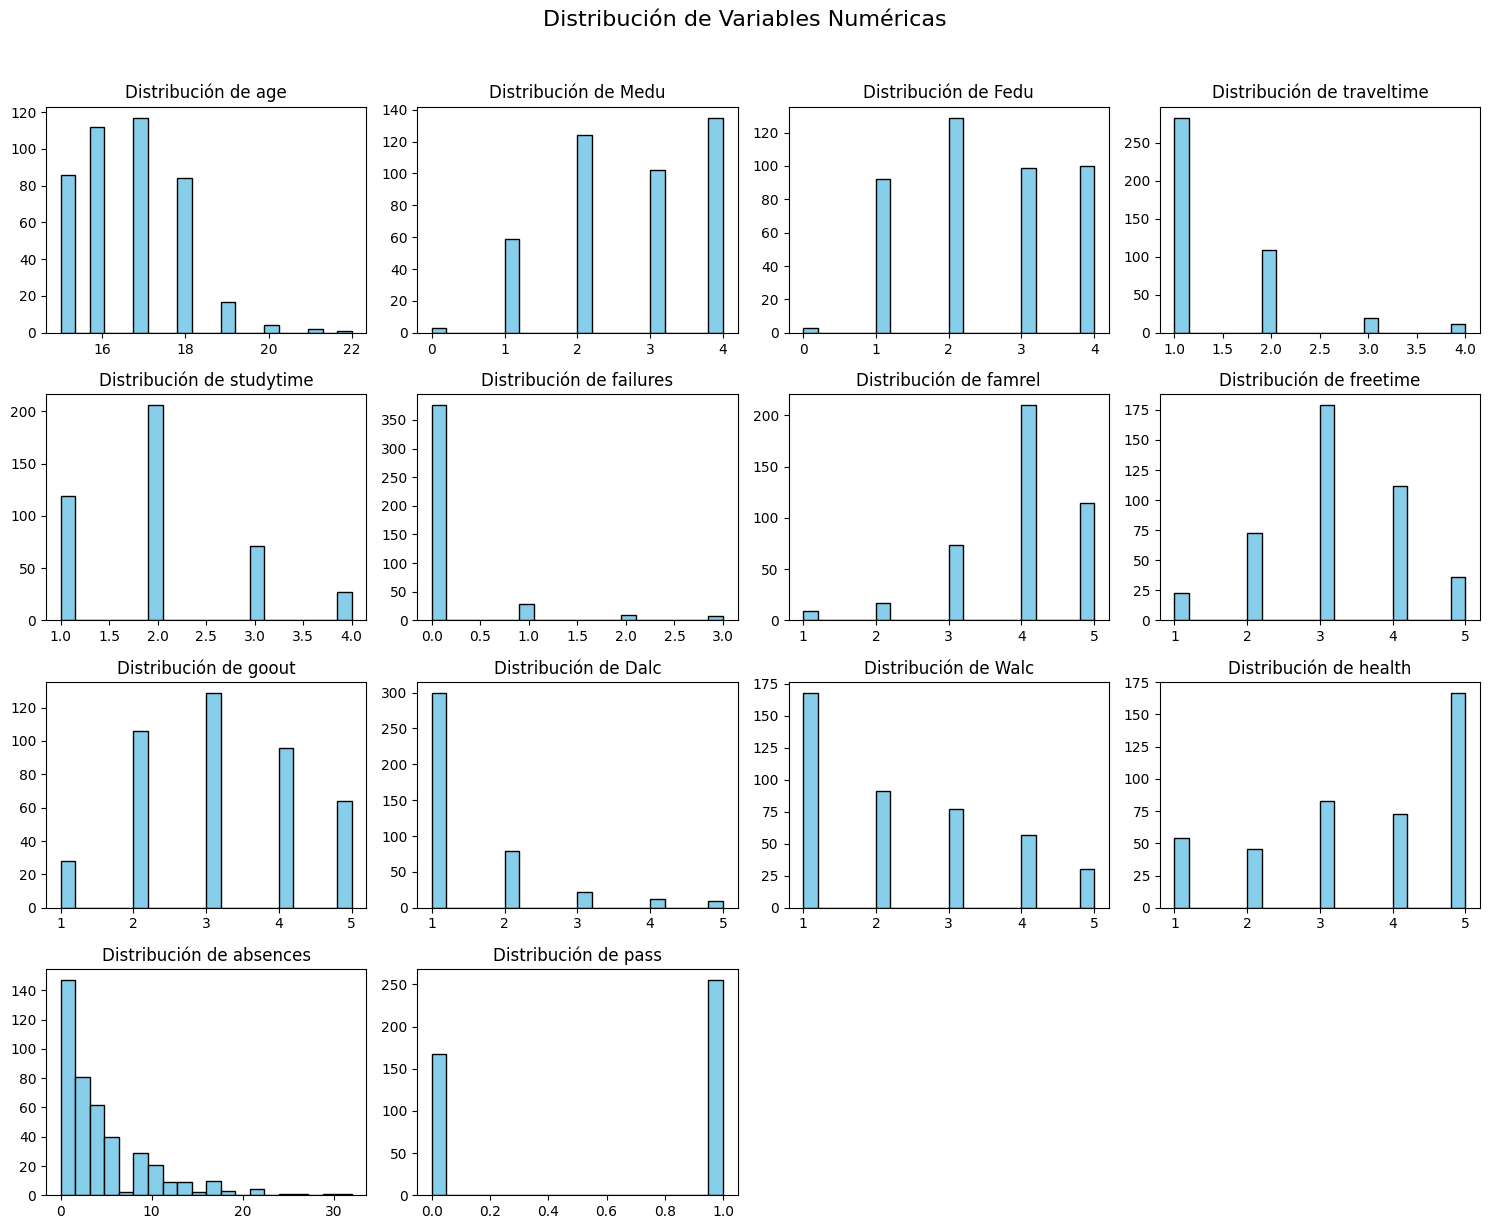

In [51]:
# 1. Exploración de variables numéricas
# Visualizamos la distribución de las variables numéricas
variables_numericas = d.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Cantidad de variables numéricas:", len(variables_numericas))
print("Variables numéricas:", variables_numericas)

# Crear histogramas para cada variable numérica
plt.figure(figsize=(15, 12))
num_vars = len(variables_numericas)
filas = (num_vars // 4) + (1 if num_vars % 4 != 0 else 0) # filas necesarias 4 columnas

for i, var in enumerate(variables_numericas, 1):
    plt.subplot(filas, 4, i) # filas x 4 columnas
    plt.hist(d[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {var}')
    plt.tight_layout()
plt.suptitle("Distribución de Variables Numéricas", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

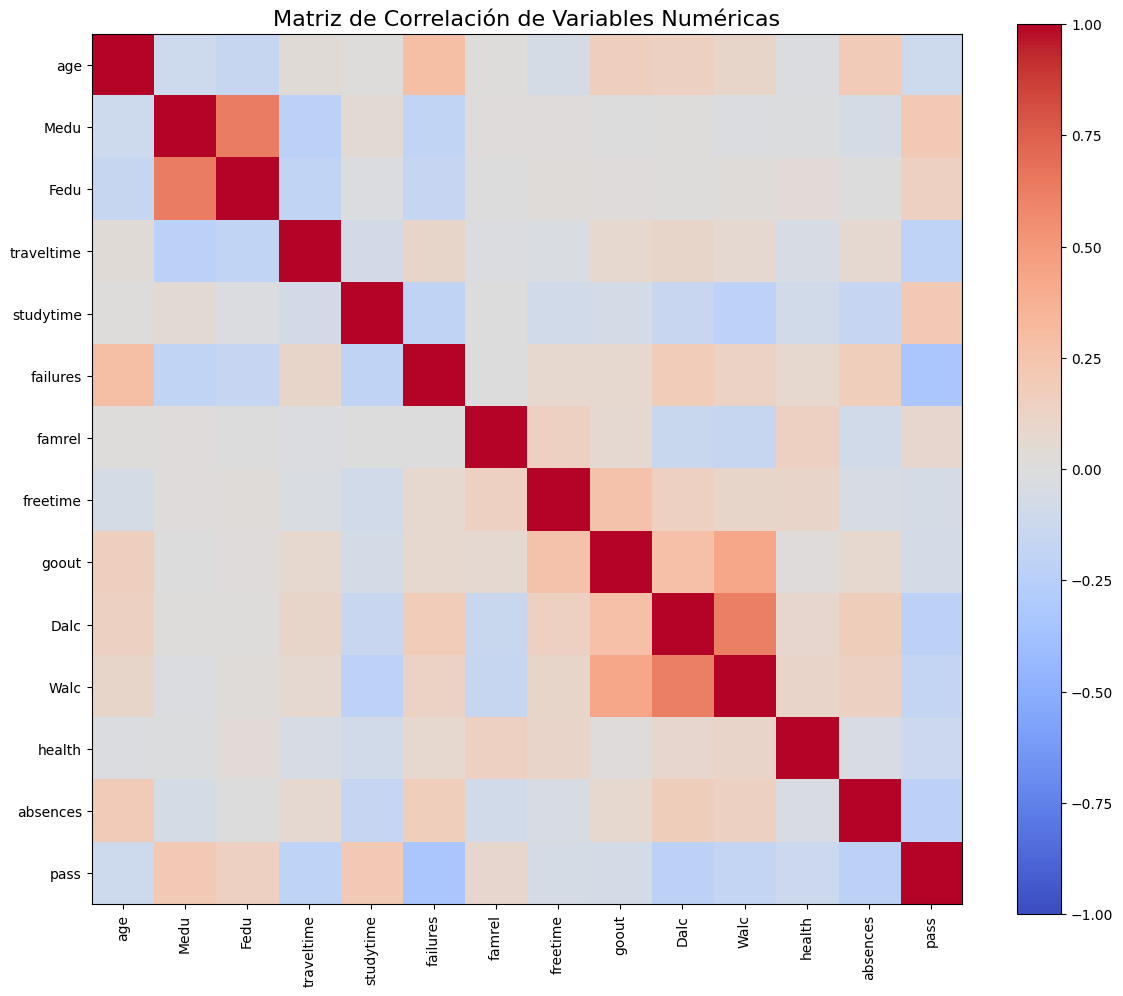


Correlaciones con la variable 'pass' (aprobación):
pass          1.000000
studytime     0.209458
Medu          0.206135
Fedu          0.144810
famrel        0.081737
freetime     -0.054819
goout        -0.064512
age          -0.116568
health       -0.124340
Walc         -0.179097
traveltime   -0.203915
absences     -0.218810
Dalc         -0.225688
failures     -0.333292
Name: pass, dtype: float64


In [52]:
# 2. Correlación entre variables numéricas
# Visualizamos la matriz de correlación
corr_matrix = d.select_dtypes(include=['int64', 'float64']).corr()

# Crear un mapa de calor (heatmap)
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para mostrar solo la mitad inferior
sns_heatmap = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(sns_heatmap)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.tight_layout()
plt.show()

# Mostrar las correlaciones más fuertes con la variable objetivo 'pass'
if 'pass' in corr_matrix.columns:
    correlaciones_pass = corr_matrix['pass'].sort_values(ascending=False)
    print("\nCorrelaciones con la variable 'pass' (aprobación):")
    print(correlaciones_pass)

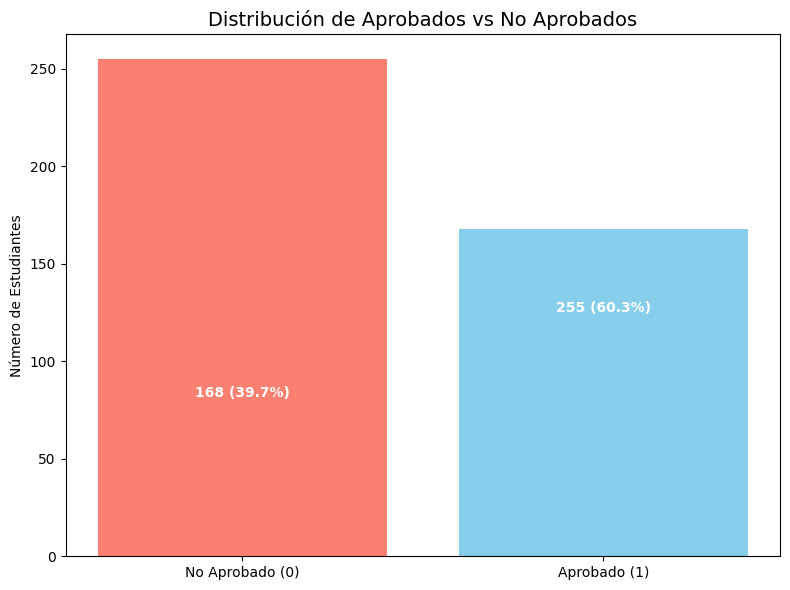

In [53]:
# 3. Análisis de la variable objetivo
plt.figure(figsize=(8, 6))
conteo_pass = d['pass'].value_counts()
plt.bar(['No Aprobado (0)', 'Aprobado (1)'], conteo_pass.values, color=['salmon', 'skyblue'])
plt.title('Distribución de Aprobados vs No Aprobados', fontsize=14)
plt.ylabel('Número de Estudiantes')
plt.text(0, conteo_pass[0]/2, f"{conteo_pass[0]} ({conteo_pass[0]/len(d)*100:.1f}%)", 
         ha='center', va='center', color='white', fontweight='bold')
plt.text(1, conteo_pass[1]/2, f"{conteo_pass[1]} ({conteo_pass[1]/len(d)*100:.1f}%)", 
         ha='center', va='center', color='white', fontweight='bold')
plt.tight_layout()
plt.show()

Cantidad de columnas binarias: 41
Columnas binarias: ['sex_F', 'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes']
Categorías originales identificadas: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'schoolsup', 'sex']


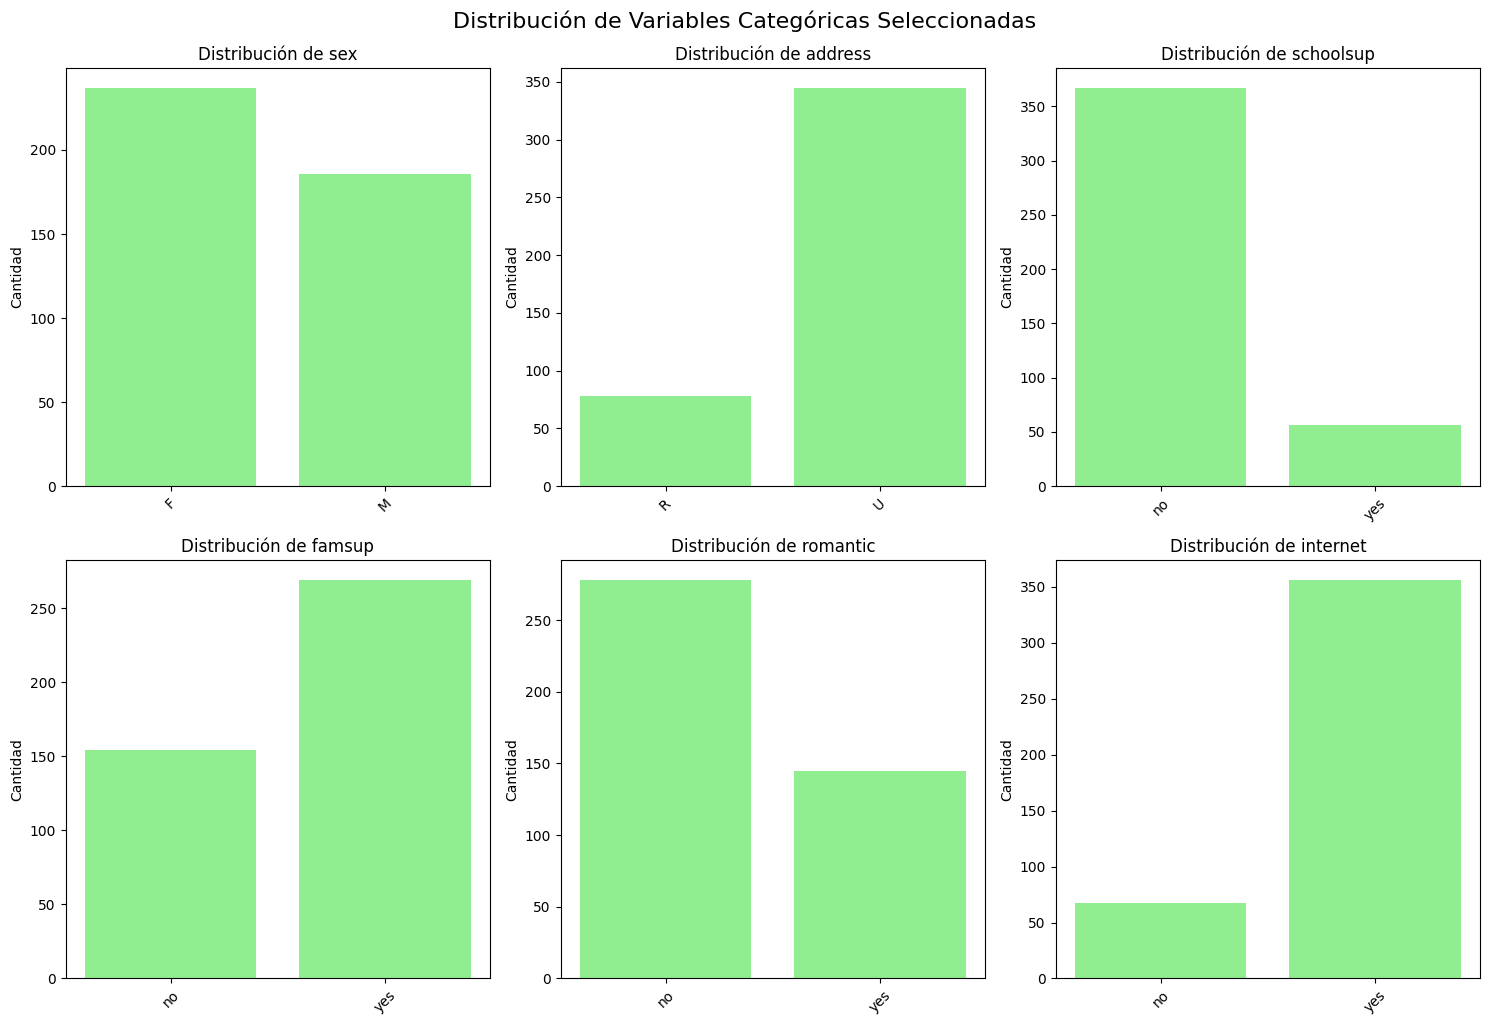

In [54]:
# 4. Análisis de variables binarias (después de one-hot encoding)
# Encontrar columnas que parecen representar variables categóricas originales
columnas_binarias = [col for col in d.columns if '_' in col]
print("Cantidad de columnas binarias:", len(columnas_binarias))
print("Columnas binarias:", columnas_binarias)
categorias_originales = set([col.split('_')[0] for col in columnas_binarias])
print("Categorías originales identificadas:", sorted(categorias_originales))

# Visualizar la distribución de algunas categorías importantes
categorias_a_mostrar = ['sex', 'address', 'schoolsup', 'famsup', 'romantic', 'internet']
plt.figure(figsize=(15, 10)) # Ajustar tamaño de la figura 15 x 10

for i, categoria in enumerate(categorias_a_mostrar, 1):
    # Obtener columnas correspondientes a esta categoría
    cols_categoria = [col for col in d.columns if col.startswith(f"{categoria}_")]
    
    # Crear subgráfico
    plt.subplot(2, 3, i) # 2 filas, 3 columnas
    valores = [d[col].sum() for col in cols_categoria]
    etiquetas = [col.split('_')[1] for col in cols_categoria]
    
    plt.bar(etiquetas, valores, color='lightgreen')
    plt.title(f'Distribución de {categoria}')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.suptitle("Distribución de Variables Categóricas Seleccionadas", y=1.02, fontsize=16)
plt.show()

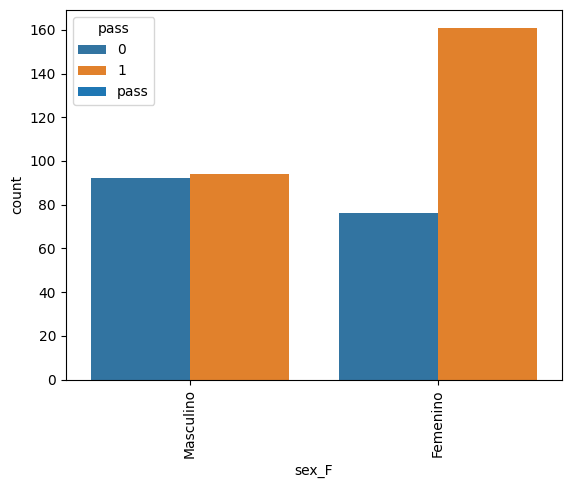

In [55]:
d.groupby(['sex_F', 'pass'])['pass'].count()

d[['sex_F','pass']].groupby(['sex_F']).mean().plot.bar()
sns.countplot(x='sex_F',hue='pass',data=d)
# cambiar las etiquetas del eje x
plt.xticks(ticks=[1, 0], labels=['Femenino', 'Masculino'])
plt.show()

Los fracasos previos son el mejor predictor de fracaso futuro.  
El consumo de alcohol y las ausencias impactan negativamente.  
Más tiempo de estudio y mejor educación de los padres predicen mejor rendimiento.  
El contexto urbano muestra ventaja sobre el rural.  
Las aspiraciones educativas y el apoyo familiar son factores protectores.  

C:\Users\saraujo\AppData\Local\Temp\ipykernel_8360\3456868091.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no_aprobados, data_aprobados], labels=['No Aprobado', 'Aprobado'])
C:\Users\saraujo\AppData\Local\Temp\ipykernel_8360\3456868091.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no_aprobados, data_aprobados], labels=['No Aprobado', 'Aprobado'])
C:\Users\saraujo\AppData\Local\Temp\ipykernel_8360\3456868091.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no_aprobados, data_aprobados], labels=['No Aprobado', 'Aprobado'])
C:\Users\saraujo\AppData\

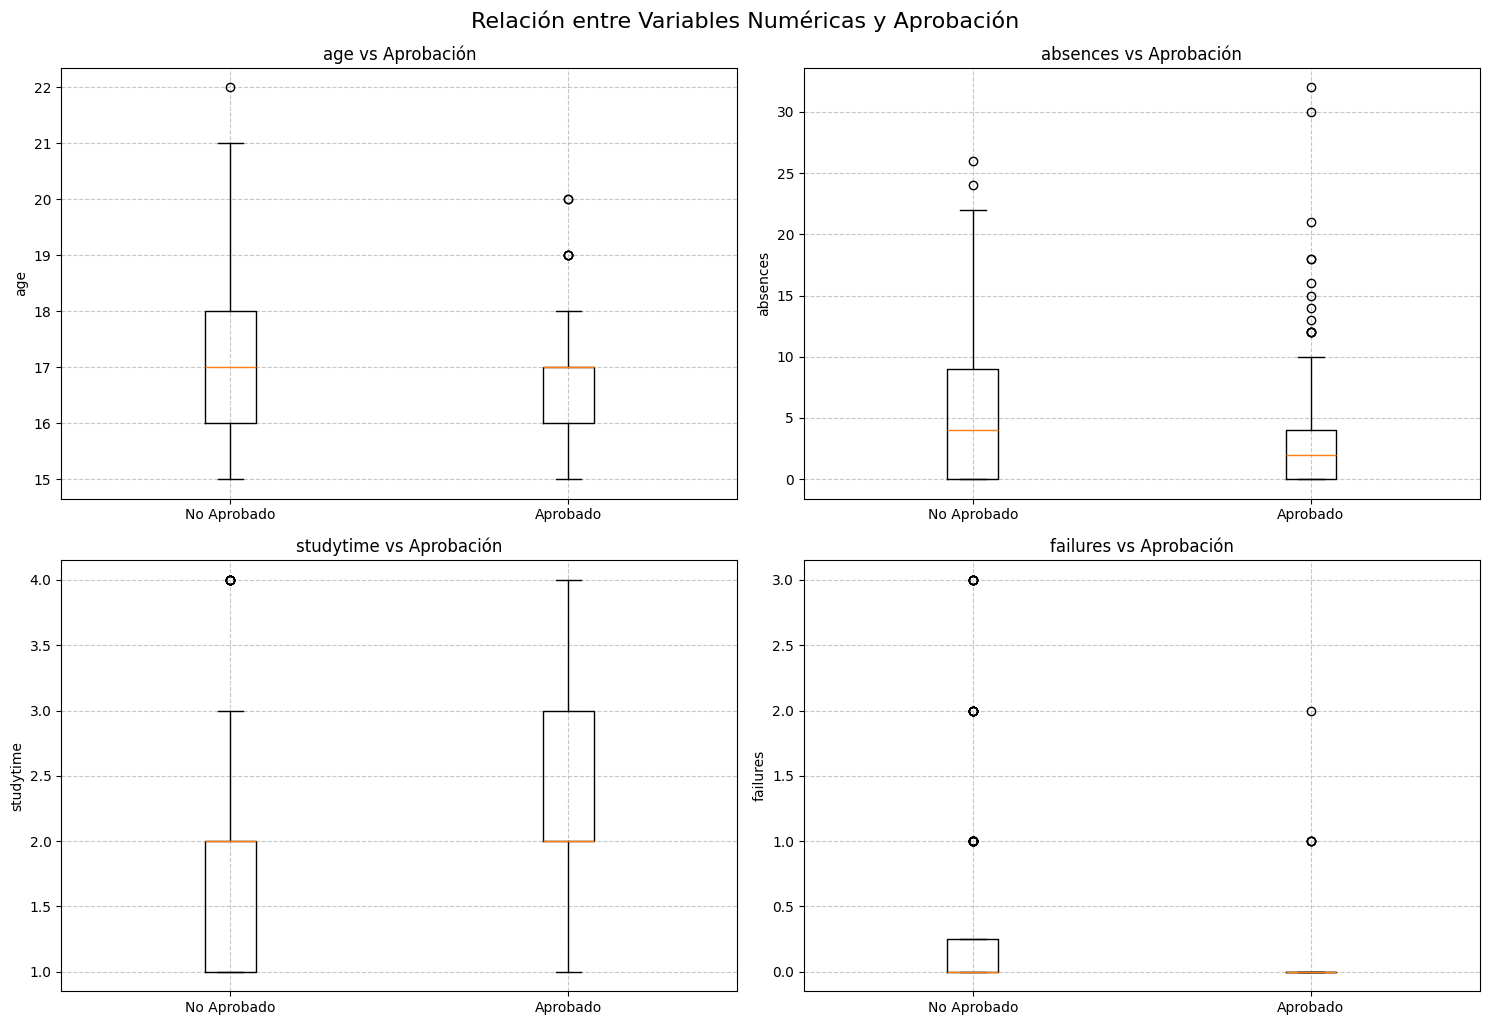

In [56]:
# 5. Relación entre variables numéricas y la variable objetivo
# Seleccionar las variables numéricas más relevantes
vars_numericas_importantes = ['age', 'absences', 'studytime', 'failures']

plt.figure(figsize=(15, 10))
for i, var in enumerate(vars_numericas_importantes, 1):
    plt.subplot(2, 2, i)
    
    # Crear boxplots agrupados por la variable 'pass'
    data_aprobados = d[d['pass'] == 1][var]
    data_no_aprobados = d[d['pass'] == 0][var]
    
    plt.boxplot([data_no_aprobados, data_aprobados], labels=['No Aprobado', 'Aprobado'])
    plt.title(f'{var} vs Aprobación')
    plt.ylabel(var)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle("Relación entre Variables Numéricas y Aprobación", y=1.02, fontsize=16)
plt.show()

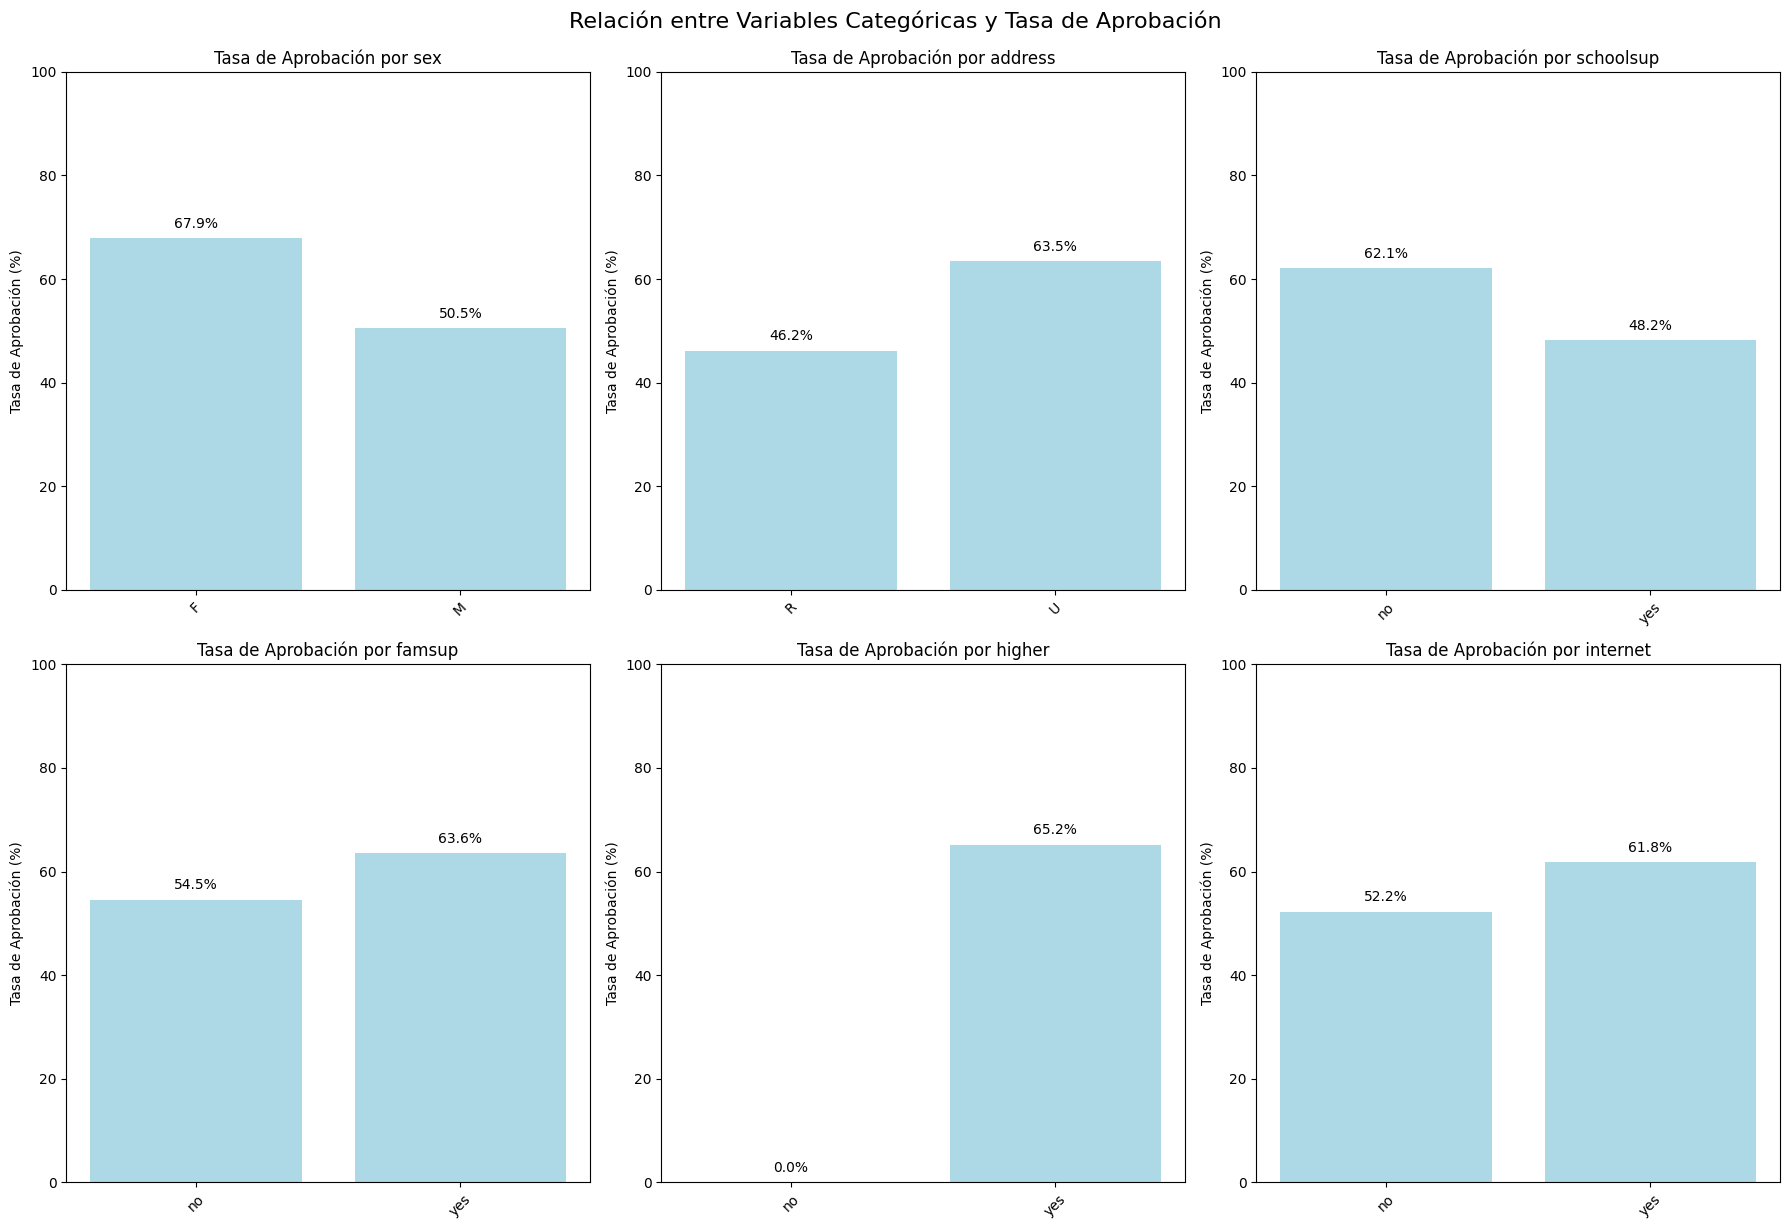

In [57]:
# 6. Relación entre variables categóricas y aprobación
# Seleccionar algunas variables categóricas interesantes
categorias_analisis = ['sex', 'address', 'schoolsup', 'famsup', 'higher', 'internet']
plt.figure(figsize=(18, 12))

for i, categoria in enumerate(categorias_analisis, 1):
    plt.subplot(2, 3, i)
    
    # Obtener columnas correspondientes a esta categoría
    cols_categoria = [col for col in d.columns if col.startswith(f"{categoria}_")]
    
    # Para cada valor de la categoría, calcular la tasa de aprobación
    tasas_aprobacion = []
    etiquetas = []

    # cols_categoria contiene las columnas binarias para la categoría actual ejemplo M y F
    for col in cols_categoria:
        # Estudiantes con este valor
        estudiantes_con_valor = d[d[col] == 1]
        if len(estudiantes_con_valor) > 0:
            # Tasa de aprobación para este grupo
            tasa = estudiantes_con_valor['pass'].mean() * 100 # solo toma los aprobados o 1
            tasas_aprobacion.append(tasa)
            etiquetas.append(col.split('_')[1])
    
    # Crear gráfico de barras
    plt.bar(etiquetas, tasas_aprobacion, color='lightblue')
    plt.title(f'Tasa de Aprobación por {categoria}')
    plt.ylabel('Tasa de Aprobación (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    
    # Añadir etiquetas con los porcentajes
    for j, tasa in enumerate(tasas_aprobacion):
        plt.text(j, tasa + 2, f"{tasa:.1f}%", ha='center')
    
plt.tight_layout()
plt.suptitle("Relación entre Variables Categóricas y Tasa de Aprobación", y=1.02, fontsize=16)
plt.show()

Top 10 Variables Numéricas con mayor correlación con 'pass':
failures      0.333292
Dalc          0.225688
absences      0.218810
studytime     0.209458
Medu          0.206135
traveltime    0.203915
Walc          0.179097
Fedu          0.144810
health        0.124340
age           0.116568
Name: pass, dtype: float64


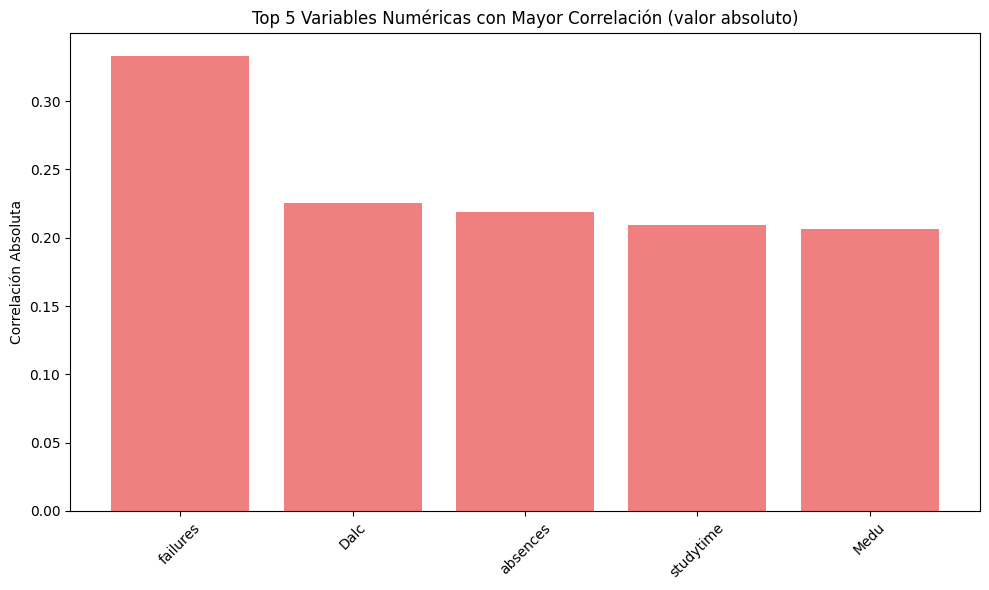

In [58]:
# 7. Análisis de variables con mayor influencia
# Encontrar variables numéricas con mayor correlación con 'pass'
if 'pass' in d.columns:
    corr_numericas = d.select_dtypes(include=['int64', 'float64']).corr()['pass']
    top_numericas = corr_numericas.drop('pass').abs().sort_values(ascending=False).head(10)
    
    print("Top 10 Variables Numéricas con mayor correlación con 'pass':")
    print(top_numericas)
    
    # Visualizar top 5
    plt.figure(figsize=(10, 6))
    top5_numericas = top_numericas.head(5)
    plt.bar(top5_numericas.index, top5_numericas.values, color='lightcoral')
    plt.title('Top 5 Variables Numéricas con Mayor Correlación (valor absoluto)')
    plt.ylabel('Correlación Absoluta')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [59]:
# 8. Resumen de insights del análisis exploratorio
print("==== CONCLUSIONES DEL ANÁLISIS EXPLORATORIO ====")
print("\n1. Distribución de la variable objetivo:")
conteo_pass = d['pass'].value_counts()
print(f"   - Estudiantes aprobados: {conteo_pass[1]} ({conteo_pass[1]/len(d)*100:.1f}%)")
print(f"   - Estudiantes no aprobados: {conteo_pass[0]} ({conteo_pass[0]/len(d)*100:.1f}%)")

print("\n2. Variables numéricas con mayor correlación con la aprobación:")
if 'pass' in d.columns:
    corr_numericas = d.select_dtypes(include=['int64', 'float64']).corr()['pass']
    top_numericas = corr_numericas.drop('pass').abs().sort_values(ascending=False).head(5)
    for var, corr in top_numericas.items():
        print(f"   - {var}: {corr:.3f}")

print("\n3. Hallazgos principales:")
print("   - Los estudiantes con más 'failures' (fracasos previos) tienen menor probabilidad de aprobar")
print("   - El tiempo de estudio ('studytime') está positivamente correlacionado con la aprobación")
print("   - Las ausencias ('absences') muestran una correlación negativa con la aprobación")
print("   - Los estudiantes que aspiran a educación superior ('higher') tienen mayores tasas de aprobación")
print("   - El acceso a internet ('internet') parece tener un efecto positivo en la aprobación")

==== CONCLUSIONES DEL ANÁLISIS EXPLORATORIO ====

1. Distribución de la variable objetivo:
   - Estudiantes aprobados: 255 (60.3%)
   - Estudiantes no aprobados: 168 (39.7%)

2. Variables numéricas con mayor correlación con la aprobación:
   - failures: 0.333
   - Dalc: 0.226
   - absences: 0.219
   - studytime: 0.209
   - Medu: 0.206

3. Hallazgos principales:
   - Los estudiantes con más 'failures' (fracasos previos) tienen menor probabilidad de aprobar
   - El tiempo de estudio ('studytime') está positivamente correlacionado con la aprobación
   - Las ausencias ('absences') muestran una correlación negativa con la aprobación
   - Los estudiantes que aspiran a educación superior ('higher') tienen mayores tasas de aprobación
   - El acceso a internet ('internet') parece tener un efecto positivo en la aprobación


##### 1.2. Separar las variables

In [60]:
# Separar las características (variables independientes) de la variable objetivo
d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

In [61]:
d_att.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,4,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,1,3,2,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,3,3,6,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,1,5,0,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,2,5,0,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False


In [62]:
d_pass.head()

0    0
1    0
2    1
3    1
4    1
Name: pass, dtype: int64

In [63]:
# División de la data en entrenamiento (70%) y prueba (30%)
# Aunque en el PDF para el árbol de decisión se hace una división manual,
# se usará train_test_split para una mejor práctica como se sugiere en los otros modelos.
d_train_att, d_test_att, d_train_pass, d_test_pass = train_test_split(d_att, d_pass, test_size=0.3, random_state=42)

##### 2. MODELO DE ÁRBOL DE DECISIÓN

In [64]:
print("--- Ejecutando Modelo: Árbol de Decisión ---")
# Encontrar la mejor profundidad para el árbol
best_depth = 0
best_accuracy = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    if scores.mean() > best_accuracy:
        best_accuracy = scores.mean()
        best_depth = max_depth

--- Ejecutando Modelo: Árbol de Decisión ---


In [65]:
print(f"Mejor profundidad encontrada: {best_depth} con una precisión de {best_accuracy:.4f}")

Mejor profundidad encontrada: 3 con una precisión de 0.7306


In [66]:
# Entrenar el árbol de decisión con la mejor profundidad encontrada (el PDF indica que fue 2)
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=best_depth)
t.fit(d_train_att, d_train_pass)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [67]:
# Calcular y mostrar la matriz de confusión
y_pred_tree = t.predict(d_test_att)
cm_tree = confusion_matrix(d_test_pass, y_pred_tree)
print("Matriz de confusión - Árbol de Decisión:")
print(cm_tree)

Matriz de confusión - Árbol de Decisión:
[[11 43]
 [ 1 72]]


In [68]:
# Calcular y mostrar la curva ROC y AUROC
nb_probs_tree = t.predict_proba(d_test_att)[:, 1]
nb_auc_tree = roc_auc_score(d_test_pass, nb_probs_tree)
print(f"AUROC - Árbol de Decisión: {nb_auc_tree:.3f}")

AUROC - Árbol de Decisión: 0.554


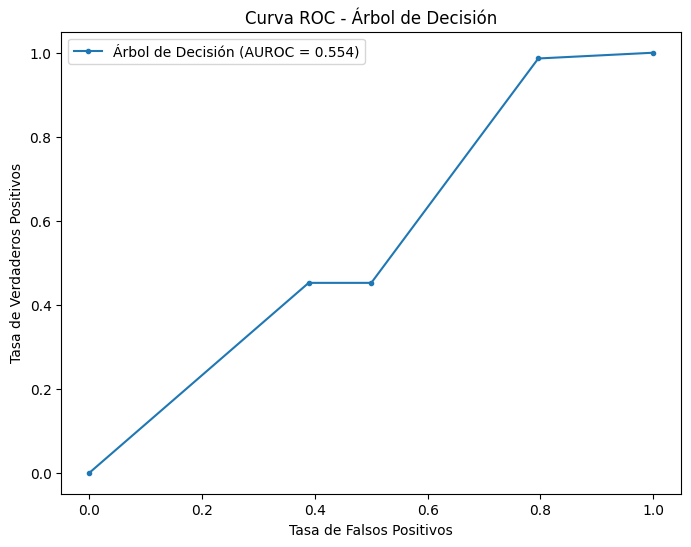

In [69]:
nb_fpr_tree, nb_tpr_tree, _ = roc_curve(d_test_pass, nb_probs_tree)
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr_tree, nb_tpr_tree, marker=".", label=f"Árbol de Decisión (AUROC = {nb_auc_tree:.3f})")
plt.title("Curva ROC - Árbol de Decisión")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()

##### 3. MODELO DE BOSQUE ALEATORIO (RANDOM FOREST)

In [70]:
print("\n--- Ejecutando Modelo: Bosque Aleatorio ---")


--- Ejecutando Modelo: Bosque Aleatorio ---


In [71]:
# Normalizar los datos para este modelo
scaler = StandardScaler()
d_att_norm = scaler.fit_transform(d_att)
d_train_att_norm, d_test_att_norm, d_train_pass_norm, d_test_pass_norm = train_test_split(d_att_norm, d_pass, test_size=0.3, random_state=42)

In [72]:
# El documento menciona una búsqueda de la mejor arquitectura, resultando en 40 estimadores y profundidad de 20
n_estimators = 40
max_depth_rf = 20

In [73]:
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth_rf, random_state=42)
rf.fit(d_train_att_norm, d_train_pass_norm)

RandomForestClassifier(max_depth=20, n_estimators=40, random_state=42)

In [74]:
# Calcular y mostrar la matriz de confusión
y_pred_rf = rf.predict(d_test_att_norm)
cm_rf = confusion_matrix(d_test_pass_norm, y_pred_rf)
print(f"Matriz de confusión - Bosque Aleatorio (Estimadores={n_estimators}, Profundidad={max_depth_rf}):")
print(cm_rf)
accuracy_rf = rf.score(d_test_att_norm, d_test_pass_norm)
print(f"Precisión (Accuracy) - Bosque Aleatorio: {accuracy_rf:.4f}")

Matriz de confusión - Bosque Aleatorio (Estimadores=40, Profundidad=20):
[[25 29]
 [ 7 66]]
Precisión (Accuracy) - Bosque Aleatorio: 0.7165


In [75]:
# Calcular y mostrar la curva ROC y AUROC
nb_probs_rf = rf.predict_proba(d_test_att_norm)[:, 1]
nb_auc_rf = roc_auc_score(d_test_pass_norm, nb_probs_rf)
print(f"AUROC - Bosque Aleatorio: {nb_auc_rf:.3f}")

AUROC - Bosque Aleatorio: 0.694


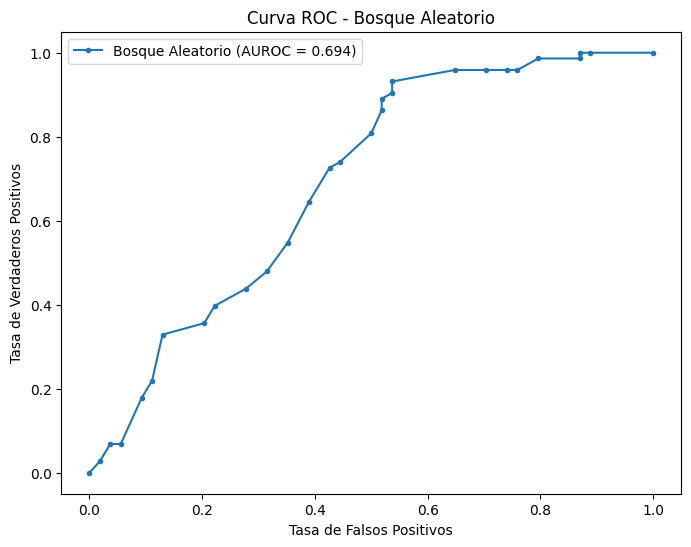

In [76]:
nb_fpr_rf, nb_tpr_rf, _ = roc_curve(d_test_pass_norm, nb_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr_rf, nb_tpr_rf, marker=".", label=f"Bosque Aleatorio (AUROC = {nb_auc_rf:.3f})")
plt.title("Curva ROC - Bosque Aleatorio")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()

##### 4. MODELO DE MÁQUINAS DE SOPORTE VECTORIAL (SVM)

In [77]:
print("\n--- Ejecutando Modelo: Máquinas de Soporte Vectorial (SVM) ---")
# Se utilizan los mismos datos normalizados que en Random Forest
mi_svm = svm.SVC(probability=True, random_state=42) # probability=True es necesario para roc_auc_score
mi_svm.fit(d_train_att_norm, d_train_pass_norm)


--- Ejecutando Modelo: Máquinas de Soporte Vectorial (SVM) ---


SVC(probability=True, random_state=42)

In [78]:
# Calcular y mostrar la matriz de confusión
y_pred_svm = mi_svm.predict(d_test_att_norm)
cm_svm = confusion_matrix(d_test_pass_norm, y_pred_svm)
print("Matriz de confusión - SVM:")
print(cm_svm)
accuracy_svm = mi_svm.score(d_test_att_norm, d_test_pass_norm)
print(f"Precisión (Accuracy) - SVM: {accuracy_svm:.4f}")

Matriz de confusión - SVM:
[[21 33]
 [ 5 68]]
Precisión (Accuracy) - SVM: 0.7008


In [79]:
# No se calcula la curva ROC para SVM en el PDF, pero se incluye aquí por completitud
nb_probs_svm = mi_svm.predict_proba(d_test_att_norm)[:, 1]
nb_auc_svm = roc_auc_score(d_test_pass_norm, nb_probs_svm)
print(f"AUROC - SVM: {nb_auc_svm:.3f}")

AUROC - SVM: 0.708


##### 5. MODELO DE REDES NEURONALES

In [80]:
print("\n--- Ejecutando Modelo: Redes Neuronales ---")
# Se utilizan los mismos datos normalizados
# El documento encuentra una arquitectura óptima de 23x45
n1, n2 = 23, 45


--- Ejecutando Modelo: Redes Neuronales ---


In [81]:
rn = MLPClassifier(hidden_layer_sizes=(n1, n2), activation='relu', max_iter=3000, random_state=42)
rn.fit(d_train_att_norm, d_train_pass_norm)


MLPClassifier(hidden_layer_sizes=(23, 45), max_iter=3000, random_state=42)

In [82]:
# Calcular y mostrar la matriz de confusión
y_pred_rn = rn.predict(d_test_att_norm)
cm_rn = confusion_matrix(d_test_pass_norm, y_pred_rn)
print(f"Matriz de confusión - Red Neuronal (Arquitectura={n1}x{n2}):")
print(cm_rn)
accuracy_rn = rn.score(d_test_att_norm, d_test_pass_norm)
print(f"Precisión (Accuracy) - Red Neuronal: {accuracy_rn:.4f}")

Matriz de confusión - Red Neuronal (Arquitectura=23x45):
[[21 33]
 [11 62]]
Precisión (Accuracy) - Red Neuronal: 0.6535


In [83]:
# Calcular y mostrar la curva ROC y AUROC
nb_probs_rn = rn.predict_proba(d_test_att_norm)[:, 1]
nb_auc_rn = roc_auc_score(d_test_pass_norm, nb_probs_rn)
print(f"AUROC - Red Neuronal: {nb_auc_rn:.3f}")

AUROC - Red Neuronal: 0.653


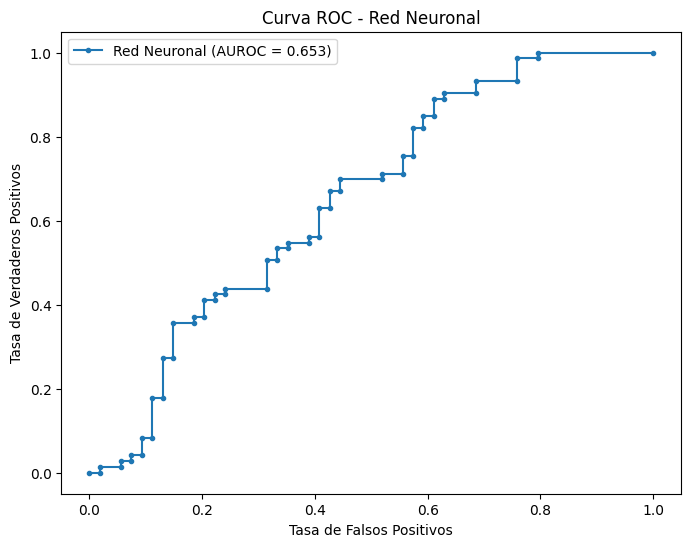

In [84]:
nb_fpr_rn, nb_tpr_rn, _ = roc_curve(d_test_pass_norm, nb_probs_rn)
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr_rn, nb_tpr_rn, marker=".", label=f"Red Neuronal (AUROC = {nb_auc_rn:.3f})")
plt.title("Curva ROC - Red Neuronal")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()

##### 6. DISCUSIÓN DE RESULTADOS

In [85]:
print("\n--- Comparación de Resultados ---")
resultados = {
    "Algoritmo": ["Árbol de Decisiones", "Bosque Aleatorio", "Máquinas de Soporte Vectorial", "Redes Neuronales"],
    "Accuracy": [best_accuracy, accuracy_rf, accuracy_svm, accuracy_rn],
    "AUROC": [nb_auc_tree, nb_auc_rf, nb_auc_svm, nb_auc_rn]
}


--- Comparación de Resultados ---


In [86]:
df_resultados = pd.DataFrame(resultados)
print(df_resultados.round(4))

                       Algoritmo  Accuracy   AUROC
0            Árbol de Decisiones    0.7306  0.5535
1               Bosque Aleatorio    0.7165  0.6937
2  Máquinas de Soporte Vectorial    0.7008  0.7078
3               Redes Neuronales    0.6535  0.6527
